***Importing Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

***Loading Dataset***

In [ ]:
df = pd.read_csv("/content/fertilizer_recommendation_dataset.csv")
df.head()

Temperature  Moisture    Rainfall        PH   Nitrogen  Phosphorous  \
0    50.179845  0.725893  205.600816  6.227358  66.701872    76.963560   
1    21.633318  0.721958  306.081601  7.173131  71.583316   163.057636   
2    23.060964  0.685751  259.336414  7.380793  75.709830    62.091508   
3    26.241975  0.755095  212.703513  6.883367  78.033687   151.012521   
4    21.490157  0.730672  268.786767  7.578760  71.765123    66.257371   

    Potassium    Carbon        Soil  Crop                  Fertilizer  \
0   96.429065  0.496300  Loamy Soil  rice                     Compost   
1  148.128347  1.234242  Loamy Soil  rice     Balanced NPK Fertilizer   
2   80.308971  1.795650  Peaty Soil  rice  Water Retaining Fertilizer   
3  153.005712  1.517556  Loamy Soil  rice     Balanced NPK Fertilizer   
4   97.000886  1.782985  Peaty Soil  rice          Organic Fertilizer   

                                              Remark  
0  Enhances organic matter and improves soil stru...  
1  Provides a balanced mix of nitrogen, phosphoru...  
2  Improves water retention in dry soils. Prefer ...  
3  Provides a balanced mix of nitrogen, phosphoru...  
4  Enhances fertility naturally, ideal for peaty ...

In [ ]:
df.shape

(3100, 12)

In [ ]:
df.isnull().sum()

Temperature    0
Moisture       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
Fertilizer     0
Remark         0
dtype: int64

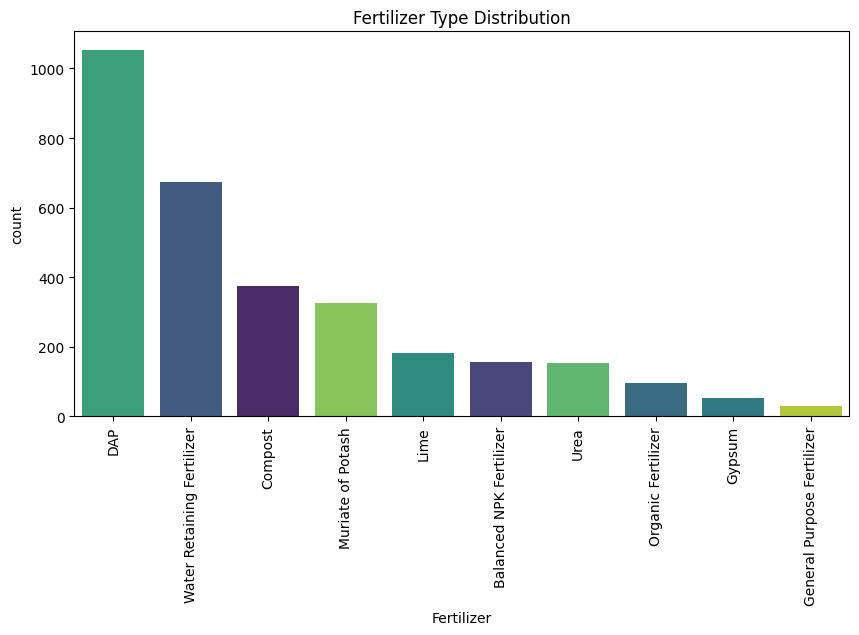

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Fertilizer', data=df, order=df['Fertilizer'].value_counts().index,hue='Fertilizer', palette='viridis')
plt.xticks(rotation=90)
plt.title('Fertilizer Type Distribution')
plt.show()

In [ ]:
df['Fertilizer'].value_counts()

Fertilizer
DAP                           1054
Water Retaining Fertilizer     675
Compost                        375
Muriate of Potash              326
Lime                           181
Balanced NPK Fertilizer        157
Urea                           154
Organic Fertilizer              95
Gypsum                          52
General Purpose Fertilizer      31
Name: count, dtype: int64

In [ ]:
df['Crop'].value_counts()

Crop
rice            100
wheat           100
Mung Bean       100
Tea             100
millet          100
maize           100
Lentil          100
Jute            100
Coffee          100
Cotton          100
Ground Nut      100
Peas            100
Rubber          100
Sugarcane       100
Tobacco         100
Kidney Beans    100
Moth Beans      100
Coconut         100
Black gram      100
Adzuki Beans    100
Pigeon Peas     100
Chickpea        100
banana          100
grapes          100
apple           100
mango           100
muskmelon       100
orange          100
papaya          100
pomegranate     100
watermelon      100
Name: count, dtype: int64

In [ ]:
df['Soil'].value_counts()

Soil
Acidic Soil      1519
Peaty Soil        537
Neutral Soil      510
Loamy Soil        489
Alkaline Soil      45
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Soil'], dtype=np.float64)

In [ ]:
df.head()

Temperature  Moisture    Rainfall        PH   Nitrogen  Phosphorous  \
0    50.179845  0.725893  205.600816  6.227358  66.701872    76.963560   
1    21.633318  0.721958  306.081601  7.173131  71.583316   163.057636   
2    23.060964  0.685751  259.336414  7.380793  75.709830    62.091508   
3    26.241975  0.755095  212.703513  6.883367  78.033687   151.012521   
4    21.490157  0.730672  268.786767  7.578760  71.765123    66.257371   

    Potassium    Carbon  Crop                  Fertilizer  \
0   96.429065  0.496300  rice                     Compost   
1  148.128347  1.234242  rice     Balanced NPK Fertilizer   
2   80.308971  1.795650  rice  Water Retaining Fertilizer   
3  153.005712  1.517556  rice     Balanced NPK Fertilizer   
4   97.000886  1.782985  rice          Organic Fertilizer   

                                              Remark  Soil_Acidic Soil  \
0  Enhances organic matter and improves soil stru...               0.0   
1  Provides a balanced mix of nitrogen, phosphoru...               0.0   
2  Improves water retention in dry soils. Prefer ...               0.0   
3  Provides a balanced mix of nitrogen, phosphoru...               0.0   
4  Enhances fertility naturally, ideal for peaty ...               0.0   

   Soil_Alkaline Soil  Soil_Loamy Soil  Soil_Neutral Soil  Soil_Peaty Soil  
0                 0.0              1.0                0.0              0.0  
1                 0.0              1.0                0.0              0.0  
2                 0.0              0.0                0.0              1.0  
3                 0.0              1.0                0.0              0.0  
4                 0.0              0.0                0.0              1.0

In [ ]:
data = df.drop('Remark',axis=1)

In [ ]:
data.head()

Temperature  Moisture    Rainfall        PH   Nitrogen  Phosphorous  \
0    50.179845  0.725893  205.600816  6.227358  66.701872    76.963560   
1    21.633318  0.721958  306.081601  7.173131  71.583316   163.057636   
2    23.060964  0.685751  259.336414  7.380793  75.709830    62.091508   
3    26.241975  0.755095  212.703513  6.883367  78.033687   151.012521   
4    21.490157  0.730672  268.786767  7.578760  71.765123    66.257371   

    Potassium    Carbon  Crop                  Fertilizer  Soil_Acidic Soil  \
0   96.429065  0.496300  rice                     Compost               0.0   
1  148.128347  1.234242  rice     Balanced NPK Fertilizer               0.0   
2   80.308971  1.795650  rice  Water Retaining Fertilizer               0.0   
3  153.005712  1.517556  rice     Balanced NPK Fertilizer               0.0   
4   97.000886  1.782985  rice          Organic Fertilizer               0.0   

   Soil_Alkaline Soil  Soil_Loamy Soil  Soil_Neutral Soil  Soil_Peaty Soil  
0                 0.0              1.0                0.0              0.0  
1                 0.0              1.0                0.0              0.0  
2                 0.0              0.0                0.0              1.0  
3                 0.0              1.0                0.0              0.0  
4                 0.0              0.0                0.0              1.0

In [ ]:
soil_mapping = {
    'Soil_Acidic Soil': 'Acidic_Soil',
    'Soil_Alkaline Soil': 'Alkaline_Soil',
    'Soil_Loamy Soil': 'Loamy_Soil',
    'Soil_Neutral Soil': 'Neutral_Soil',
    'Soil_Peaty Soil': 'Peaty_Soil'
}

In [ ]:
data.rename(columns=soil_mapping,inplace=True)

In [ ]:
data.head()

Temperature  Moisture    Rainfall        PH   Nitrogen  Phosphorous  \
0    50.179845  0.725893  205.600816  6.227358  66.701872    76.963560   
1    21.633318  0.721958  306.081601  7.173131  71.583316   163.057636   
2    23.060964  0.685751  259.336414  7.380793  75.709830    62.091508   
3    26.241975  0.755095  212.703513  6.883367  78.033687   151.012521   
4    21.490157  0.730672  268.786767  7.578760  71.765123    66.257371   

    Potassium    Carbon  Crop                  Fertilizer  Acidic_Soil  \
0   96.429065  0.496300  rice                     Compost          0.0   
1  148.128347  1.234242  rice     Balanced NPK Fertilizer          0.0   
2   80.308971  1.795650  rice  Water Retaining Fertilizer          0.0   
3  153.005712  1.517556  rice     Balanced NPK Fertilizer          0.0   
4   97.000886  1.782985  rice          Organic Fertilizer          0.0   

   Alkaline_Soil  Loamy_Soil  Neutral_Soil  Peaty_Soil  
0            0.0         1.0           0.0         0.0  
1            0.0         1.0           0.0         0.0  
2            0.0         0.0           0.0         1.0  
3            0.0         1.0           0.0         0.0  
4            0.0         0.0           0.0         1.0

In [ ]:
label_encoder = LabelEncoder()
data['Crops'] = label_encoder.fit_transform(data['Crop'])

In [ ]:
data.head()

Temperature  Moisture    Rainfall        PH   Nitrogen  Phosphorous  \
0    50.179845  0.725893  205.600816  6.227358  66.701872    76.963560   
1    21.633318  0.721958  306.081601  7.173131  71.583316   163.057636   
2    23.060964  0.685751  259.336414  7.380793  75.709830    62.091508   
3    26.241975  0.755095  212.703513  6.883367  78.033687   151.012521   
4    21.490157  0.730672  268.786767  7.578760  71.765123    66.257371   

    Potassium    Carbon  Crop                  Fertilizer  Acidic_Soil  \
0   96.429065  0.496300  rice                     Compost          0.0   
1  148.128347  1.234242  rice     Balanced NPK Fertilizer          0.0   
2   80.308971  1.795650  rice  Water Retaining Fertilizer          0.0   
3  153.005712  1.517556  rice     Balanced NPK Fertilizer          0.0   
4   97.000886  1.782985  rice          Organic Fertilizer          0.0   

   Alkaline_Soil  Loamy_Soil  Neutral_Soil  Peaty_Soil  Crops  
0            0.0         1.0           0.0         0.0     28  
1            0.0         1.0           0.0         0.0     28  
2            0.0         0.0           0.0         1.0     28  
3            0.0         1.0           0.0         0.0     28  
4            0.0         0.0           0.0         1.0     28

In [ ]:
data = data.drop('Crop',axis=1)

In [ ]:
data.head()

Temperature  Moisture    Rainfall        PH   Nitrogen  Phosphorous  \
0    50.179845  0.725893  205.600816  6.227358  66.701872    76.963560   
1    21.633318  0.721958  306.081601  7.173131  71.583316   163.057636   
2    23.060964  0.685751  259.336414  7.380793  75.709830    62.091508   
3    26.241975  0.755095  212.703513  6.883367  78.033687   151.012521   
4    21.490157  0.730672  268.786767  7.578760  71.765123    66.257371   

    Potassium    Carbon                  Fertilizer  Acidic_Soil  \
0   96.429065  0.496300                     Compost          0.0   
1  148.128347  1.234242     Balanced NPK Fertilizer          0.0   
2   80.308971  1.795650  Water Retaining Fertilizer          0.0   
3  153.005712  1.517556     Balanced NPK Fertilizer          0.0   
4   97.000886  1.782985          Organic Fertilizer          0.0   

   Alkaline_Soil  Loamy_Soil  Neutral_Soil  Peaty_Soil  Crops  
0            0.0         1.0           0.0         0.0     28  
1            0.0         1.0           0.0         0.0     28  
2            0.0         0.0           0.0         1.0     28  
3            0.0         1.0           0.0         0.0     28  
4            0.0         0.0           0.0         1.0     28

***Performing Exploratory Data Analysis (EDA)***

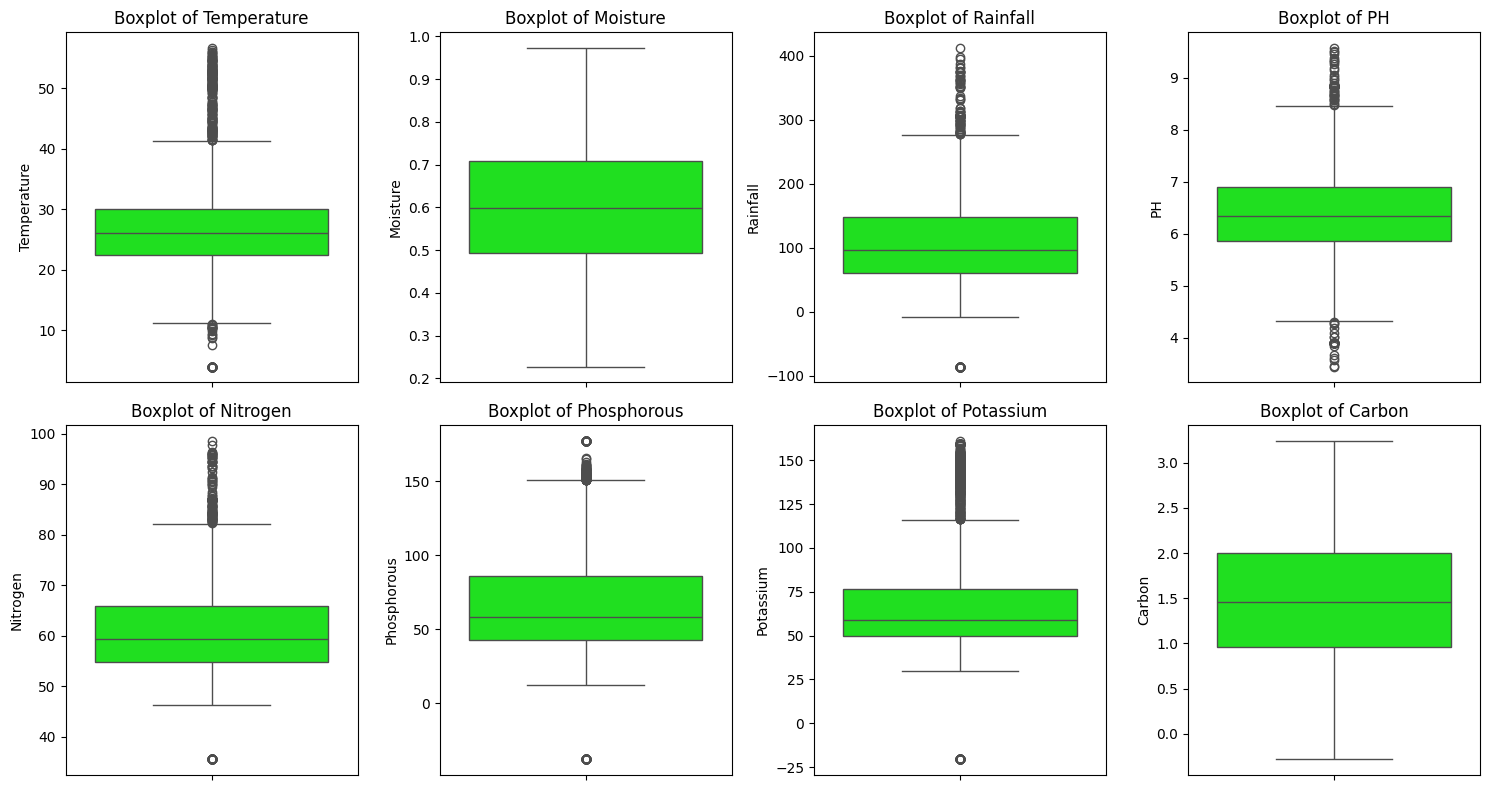

In [ ]:
# Boxplots to detect outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(['Temperature','Moisture','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=data[col],color='lime')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Handle Outliers
# IQR Method to identify and cap Outliers
def cap_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


for col in ['Temperature','Moisture','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']:
    cap_outliers(data, col)

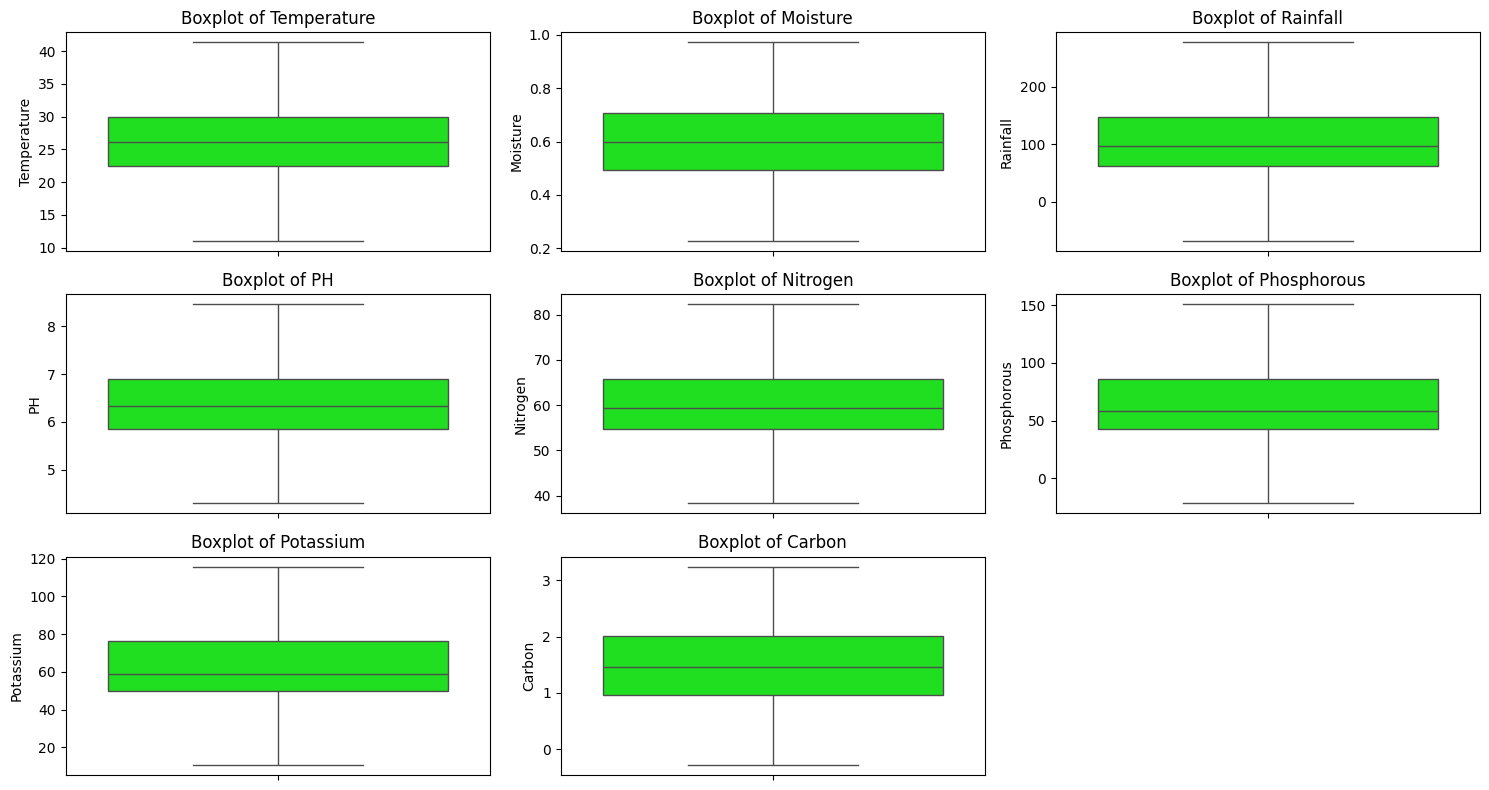

In [ ]:
# Boxplot
plt.figure(figsize=(15,8))
for i, col in enumerate(['Temperature','Moisture','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data[col],color='lime')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

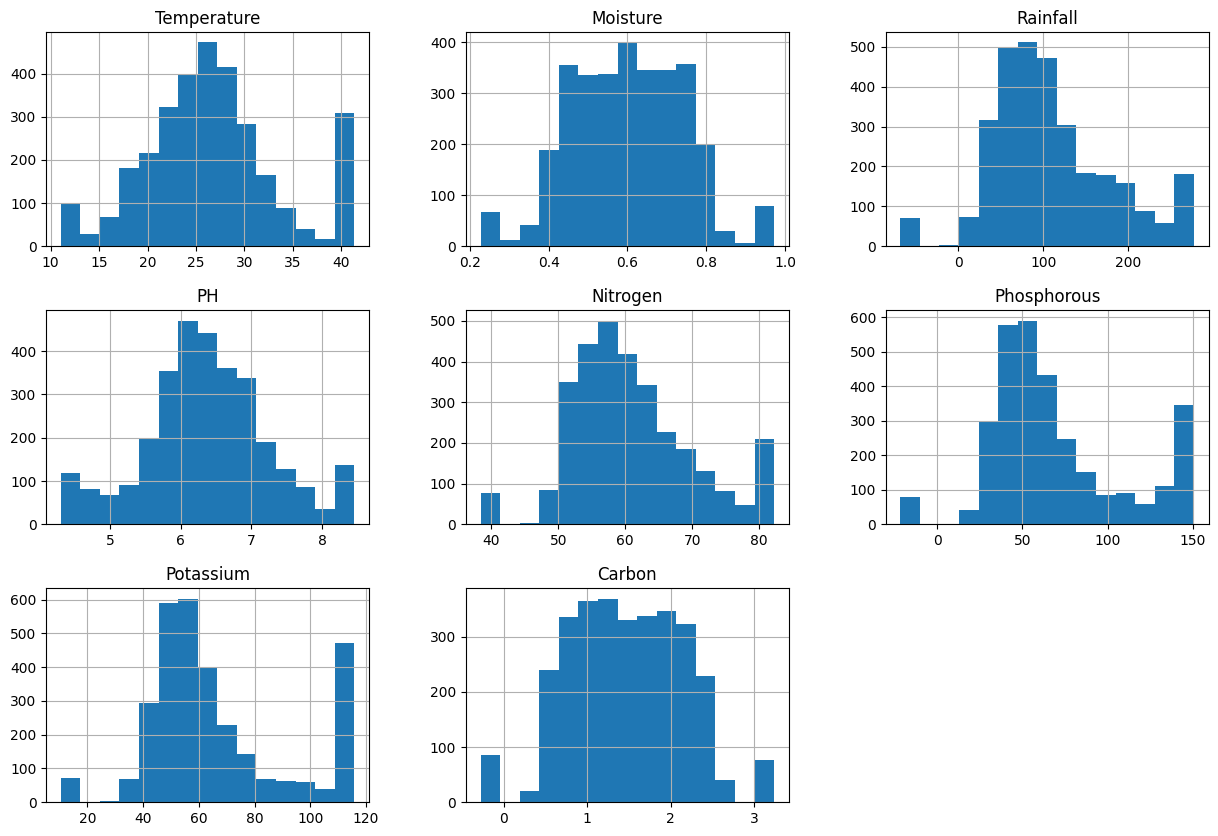

In [ ]:
# Histograms for the numerical cols
data[['Temperature','Moisture','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']].hist(bins=15, figsize=(15, 10))
plt.show()

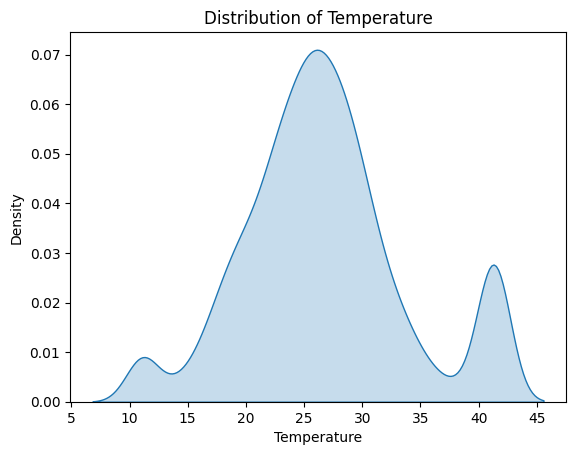

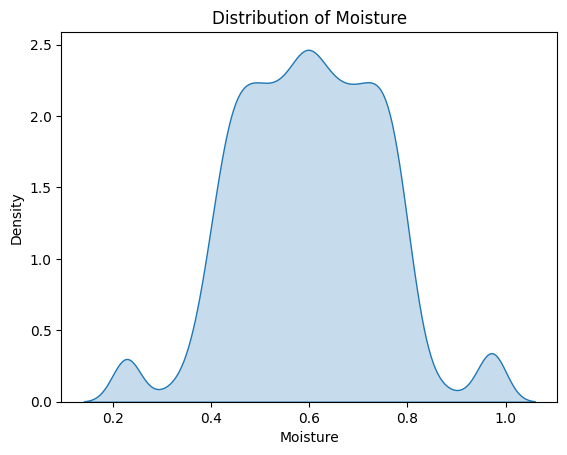

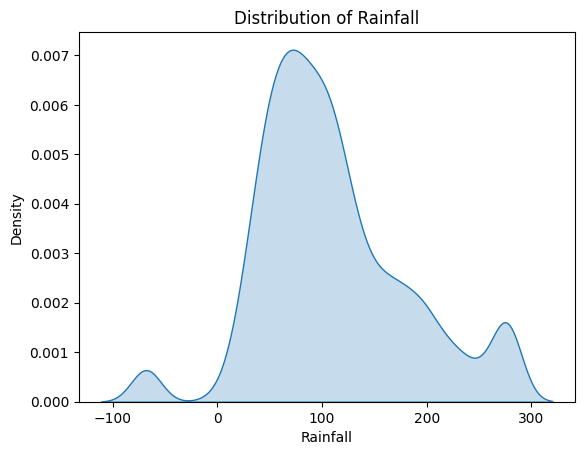

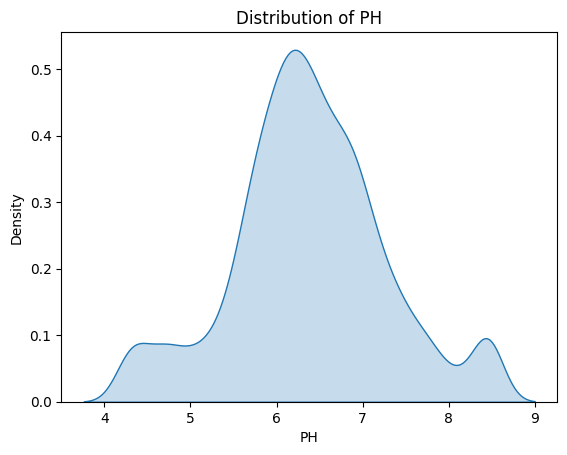

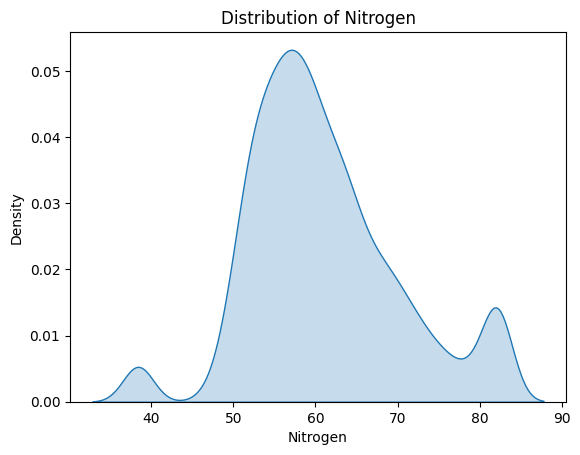

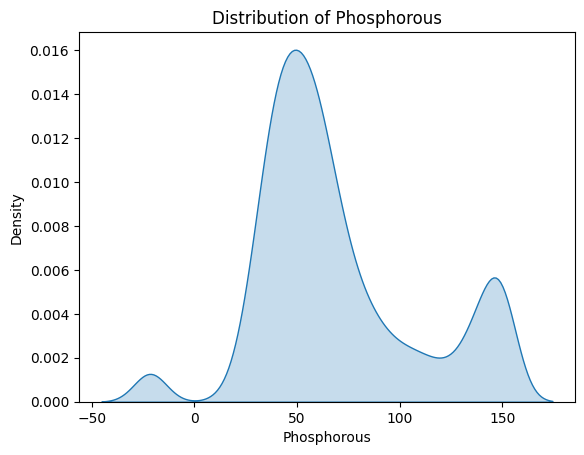

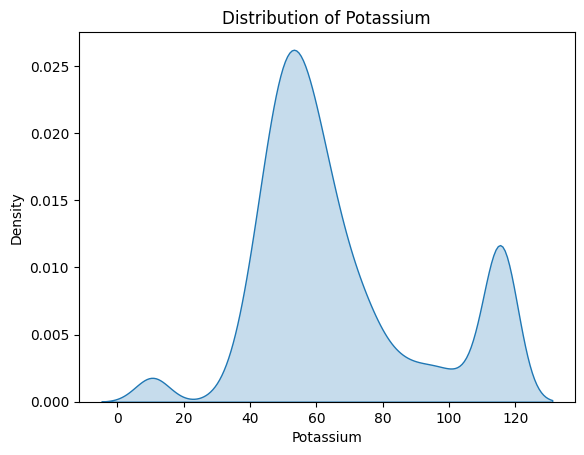

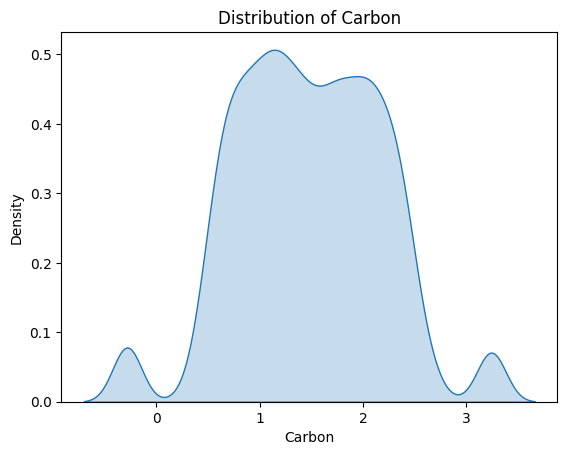

In [ ]:
# KDE plots for numerical features
for col in['Temperature','Moisture','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']:
    sns.kdeplot(data[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()

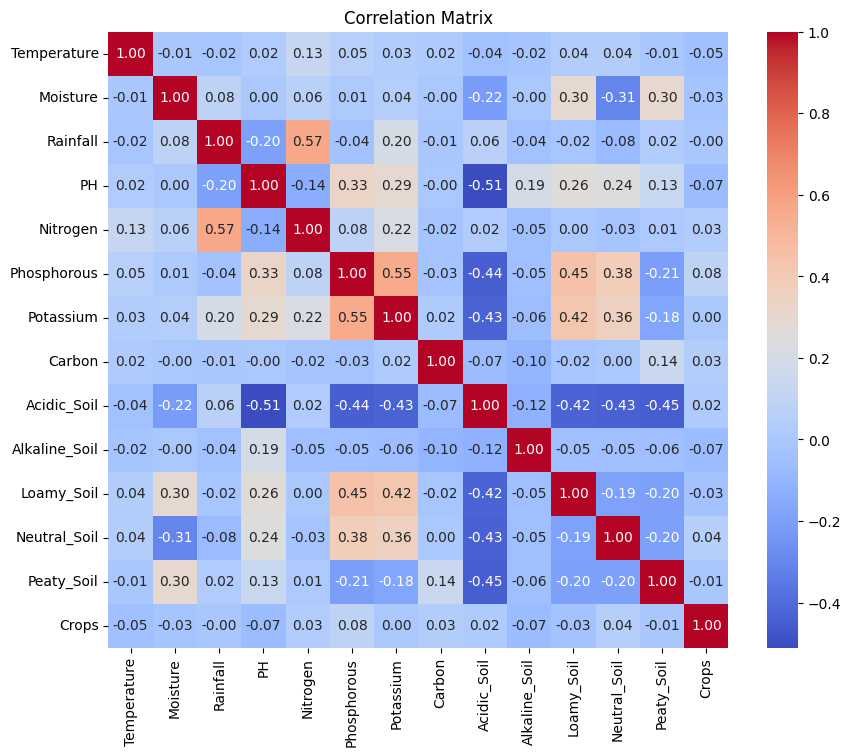

In [ ]:
# Select only numeric cols
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

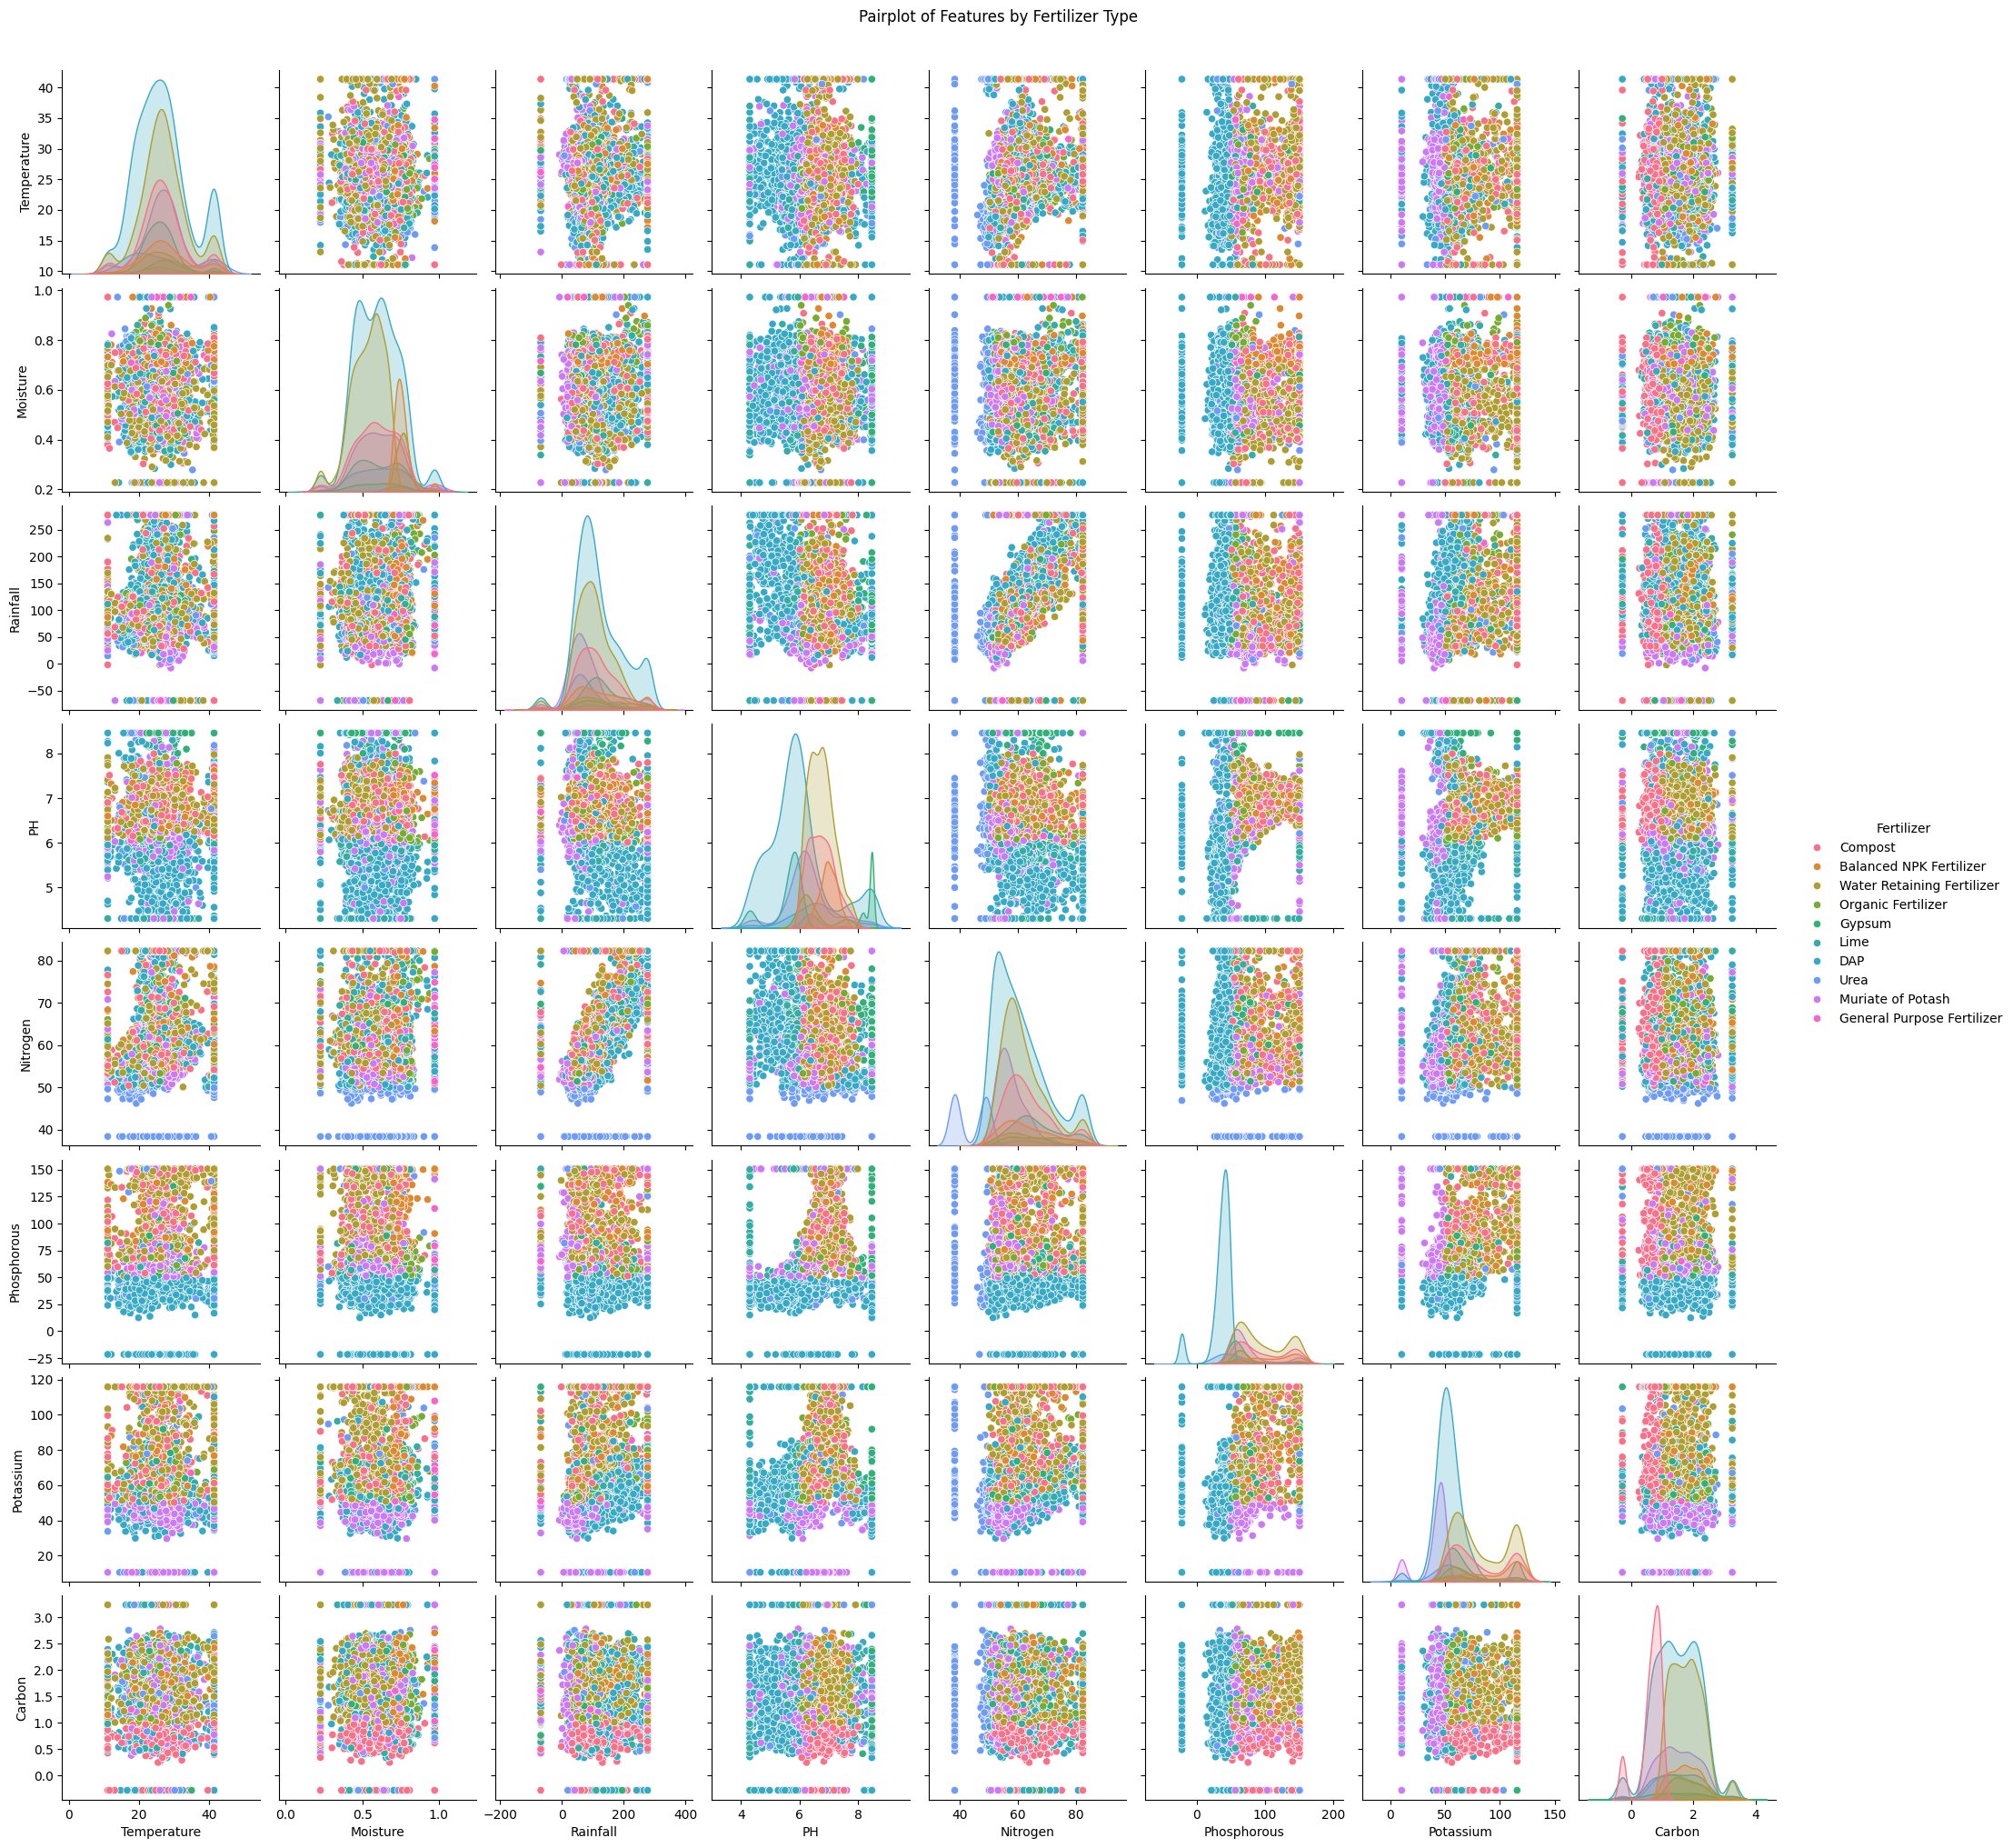

In [ ]:
# Pairplot
sns.pairplot(
    data,
    vars=['Temperature','Moisture','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon'],
    hue='Fertilizer',
    palette='husl'
)
plt.suptitle("Pairplot of Features by Fertilizer Type", y=1.02)
plt.show()

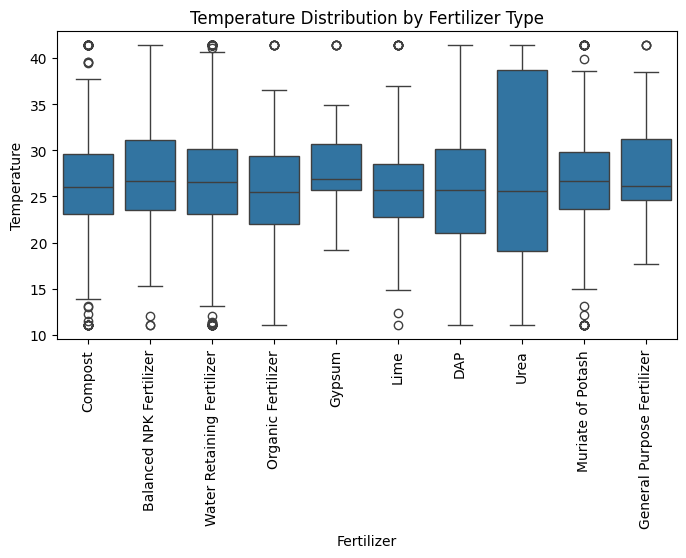

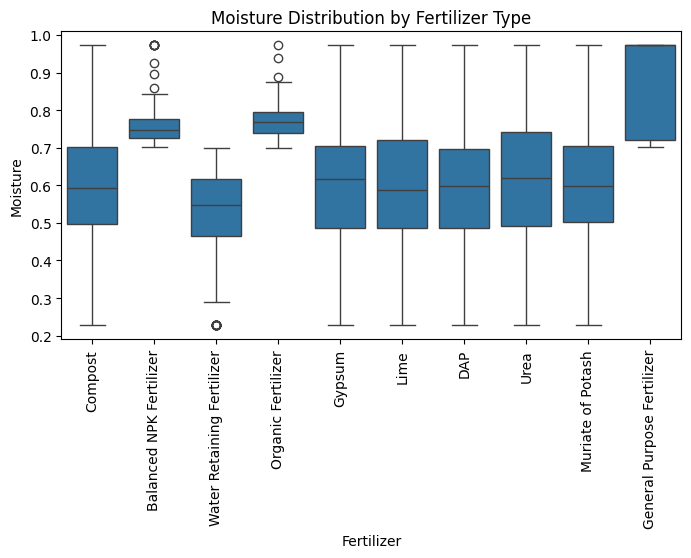

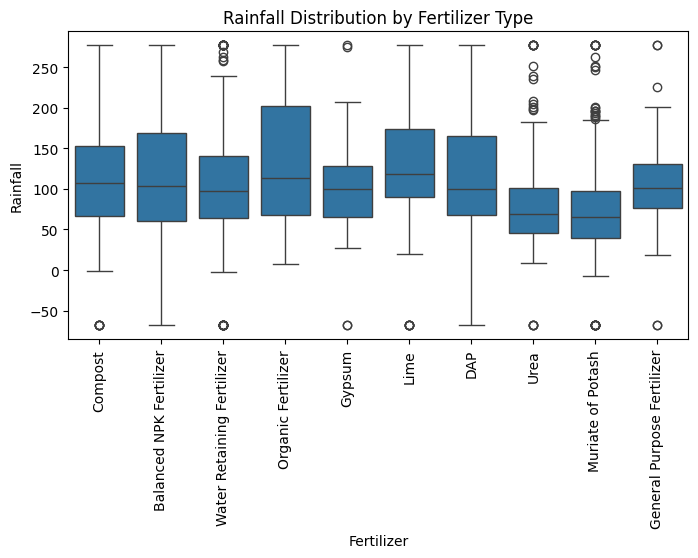

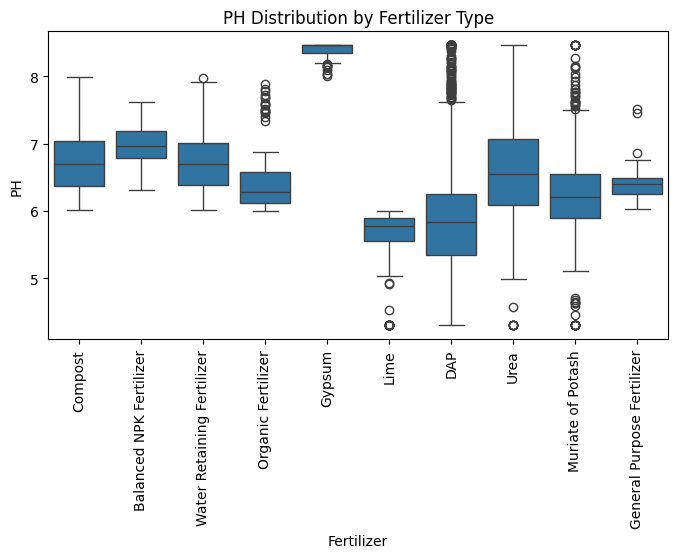

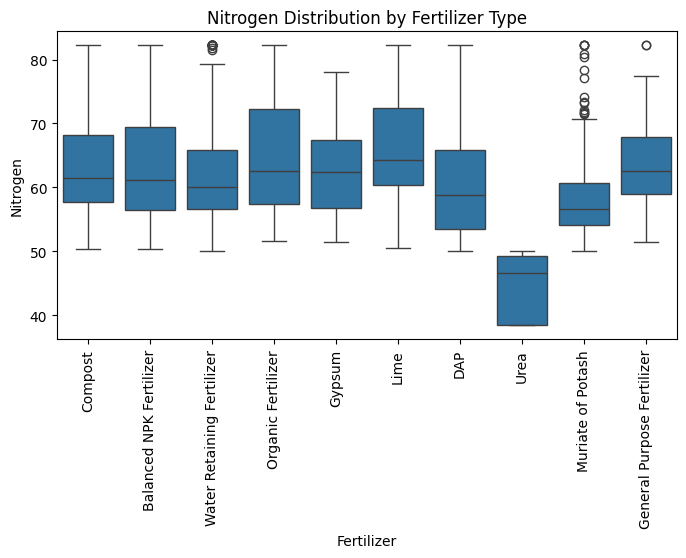

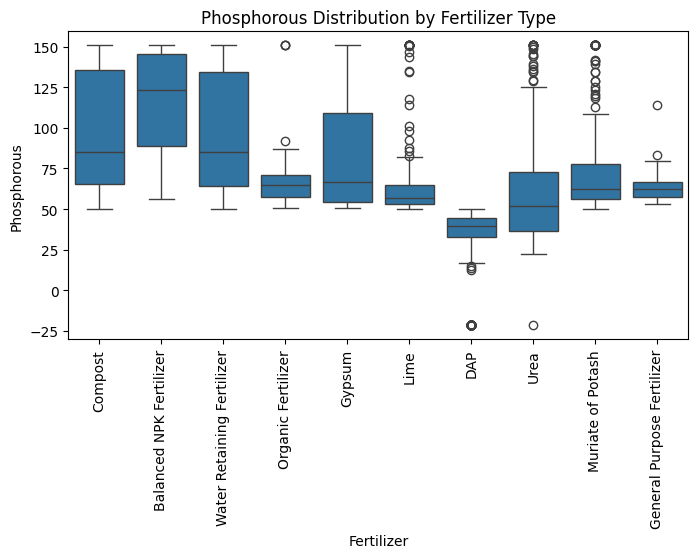

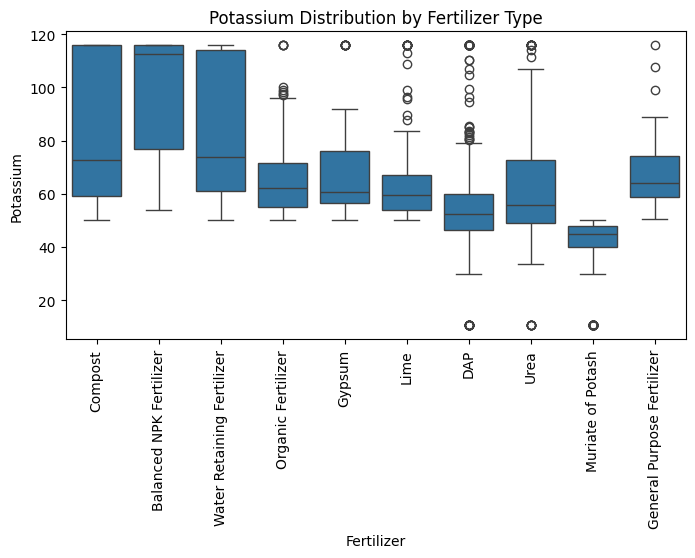

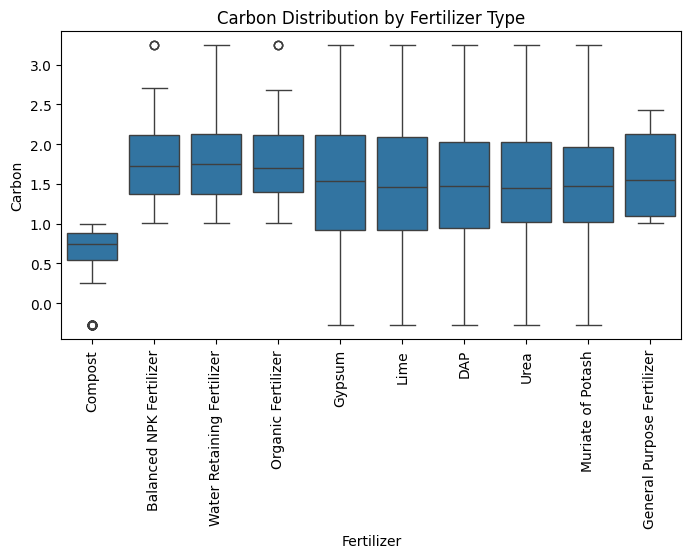

In [ ]:
# Boxplots of features grouped by crop
for col in ['Temperature','Moisture','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Fertilizer', y=col, data=data)
    plt.xticks(rotation=90)
    plt.title(f'{col} Distribution by Fertilizer Type')
    plt.show()

                            Temperature  Moisture    Rainfall        PH  \
Fertilizer                                                                
Balanced NPK Fertilizer       27.690084  0.759427  114.968506  6.976226   
Compost                       26.668185  0.594108  114.968204  6.736334   
DAP                           26.418860  0.595893  118.761617  5.959486   
General Purpose Fertilizer    27.843128  0.862304  105.538401  6.443583   
Gypsum                        28.826143  0.599008  101.375973  8.378136   
Lime                          26.179848  0.604906  131.310604  5.549776   
Muriate of Potash             26.727281  0.600153   73.483719  6.277208   
Organic Fertilizer            26.021170  0.772153  134.571169  6.508886   
Urea                          27.382663  0.614113   83.896160  6.565786   
Water Retaining Fertilizer    26.796026  0.535303  105.715358  6.734255   

                             Nitrogen  Phosphorous  Potassium    Carbon  \
Fertilizer              

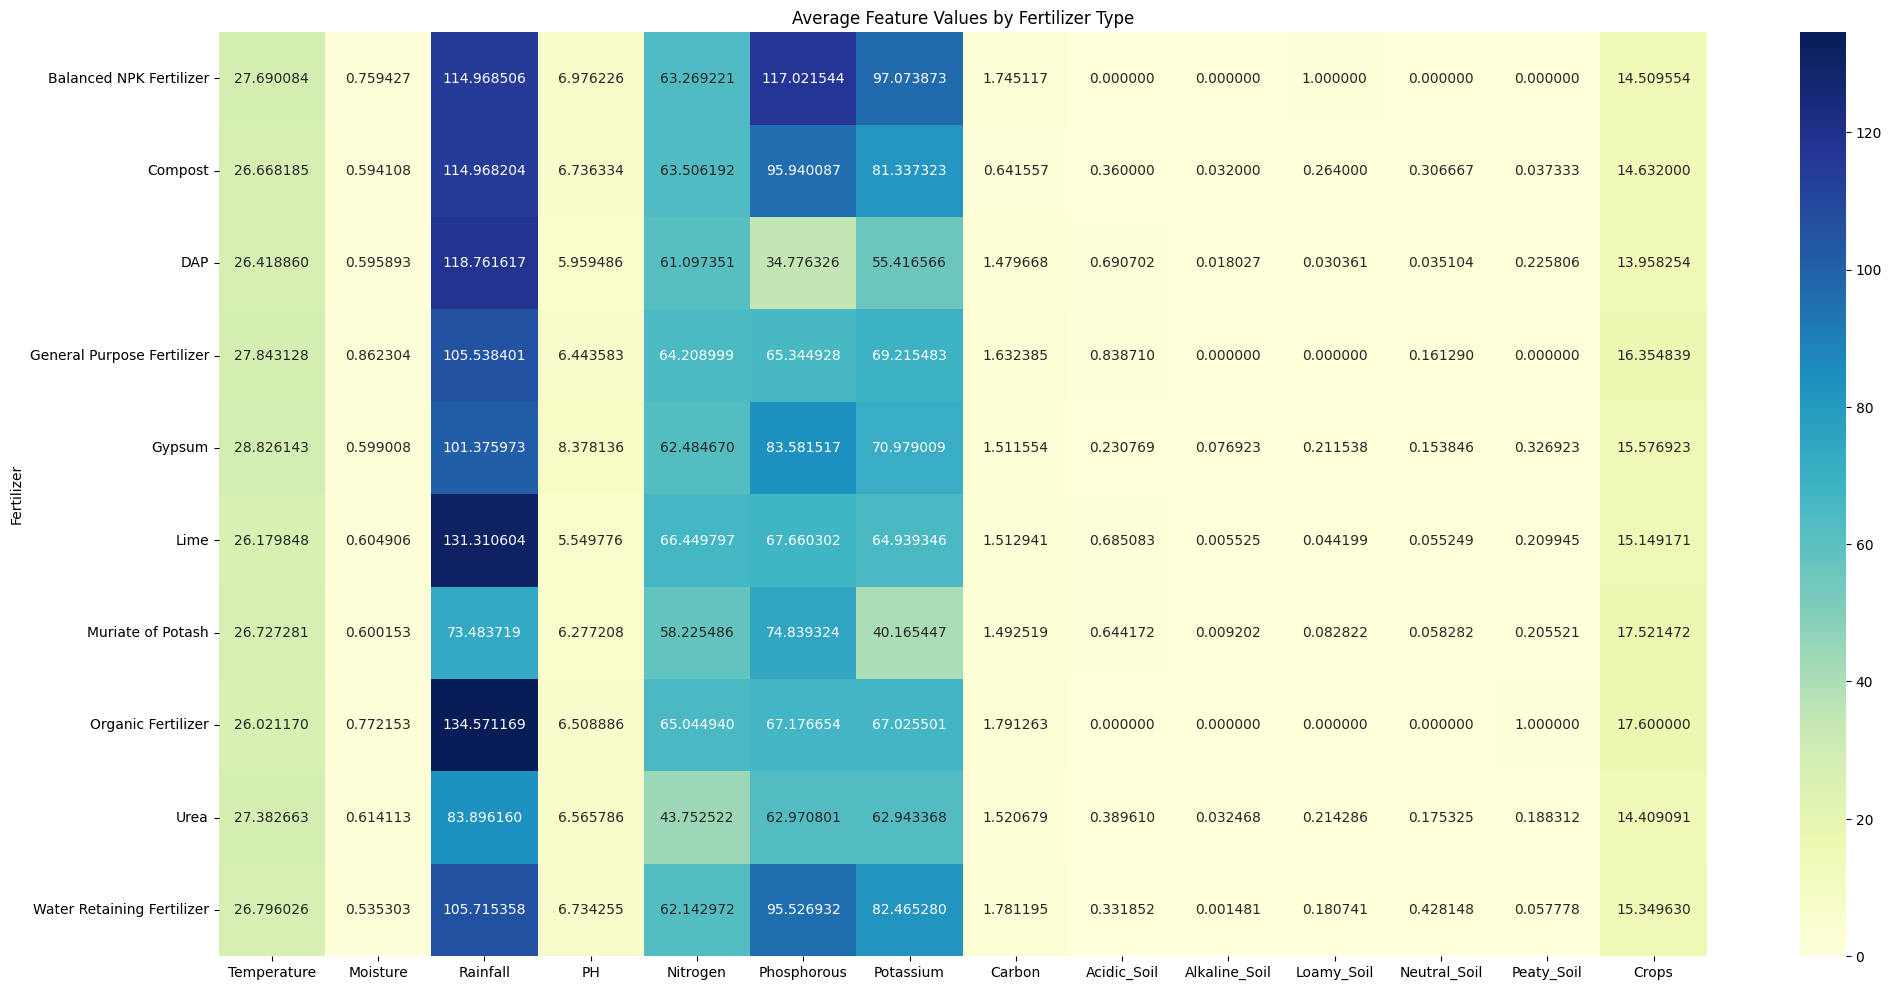

In [ ]:
fertilizer_mean = data.groupby('Fertilizer').mean()
print(fertilizer_mean)

plt.figure(figsize=(24, 12))
sns.heatmap(fertilizer_mean, annot=True, cmap='YlGnBu',fmt='f')
plt.title('Average Feature Values by Fertilizer Type')
plt.show()

***Encoding Categorical Features***

In [ ]:
label_encoder_fertilizer = LabelEncoder()
data['fertilizer'] = label_encoder_fertilizer.fit_transform(data['Fertilizer'])

In [ ]:
data.head()

Temperature  Moisture    Rainfall        PH   Nitrogen  Phosphorous  \
0    41.356961  0.725893  205.600816  6.227358  66.701872    76.963560   
1    21.633318  0.721958  277.122525  7.173131  71.583316   150.713567   
2    23.060964  0.685751  259.336414  7.380793  75.709830    62.091508   
3    26.241975  0.755095  212.703513  6.883367  78.033687   150.713567   
4    21.490157  0.730672  268.786767  7.578760  71.765123    66.257371   

    Potassium    Carbon                  Fertilizer  Acidic_Soil  \
0   96.429065  0.496300                     Compost          0.0   
1  115.807958  1.234242     Balanced NPK Fertilizer          0.0   
2   80.308971  1.795650  Water Retaining Fertilizer          0.0   
3  115.807958  1.517556     Balanced NPK Fertilizer          0.0   
4   97.000886  1.782985          Organic Fertilizer          0.0   

   Alkaline_Soil  Loamy_Soil  Neutral_Soil  Peaty_Soil  Crops  fertilizer  
0            0.0         1.0           0.0         0.0     28           1  
1            0.0         1.0           0.0         0.0     28           0  
2            0.0         0.0           0.0         1.0     28           9  
3            0.0         1.0           0.0         0.0     28           0  
4            0.0         0.0           0.0         1.0     28           7

***Scaling Numerical Values***

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Temperature','Moisture','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Acidic_Soil','Alkaline_Soil','Loamy_Soil','Neutral_Soil','Peaty_Soil','Crops']])
X = pd.DataFrame(scaled_features, columns=['Temperature','Moisture','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Acidic_Soil','Alkaline_Soil','Loamy_Soil','Neutral_Soil','Peaty_Soil','Crops'])
y = data['fertilizer']

In [ ]:
feature_names = X.columns.tolist()

In [ ]:
data.shape

(3100, 16)

In [ ]:
X.shape

(3100, 14)

In [ ]:
y.shape

(3100,)

***Splitting Dataset to Train and Test***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Training Model***

In [ ]:
model = RandomForestClassifier(random_state=42,n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

***Model Accuracy***

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [ ]:
model.score(X_test,y_test)

0.9854838709677419

In [ ]:
cm = confusion_matrix(y_test,y_pred)

***Heatmap and Classification Report***

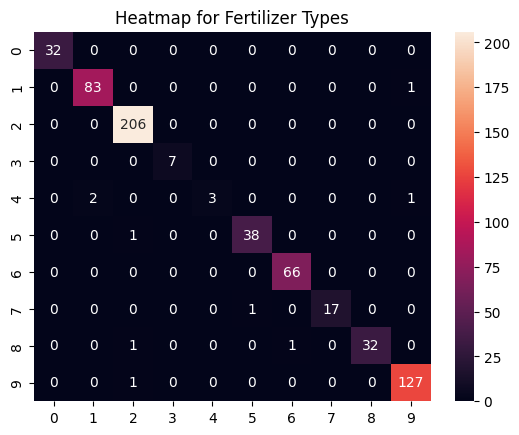

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Heatmap for Fertilizer Types")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.98      0.99      0.98        84
           2       0.99      1.00      0.99       206
           3       1.00      1.00      1.00         7
           4       1.00      0.50      0.67         6
           5       0.97      0.97      0.97        39
           6       0.99      1.00      0.99        66
           7       1.00      0.94      0.97        18
           8       1.00      0.94      0.97        34
           9       0.98      0.99      0.99       128

    accuracy                           0.99       620
   macro avg       0.99      0.93      0.95       620
weighted avg       0.99      0.99      0.98       620



***Saving Models***

In [ ]:
dump(model, "fertilizer_recommendation.joblib")

['fertilizer_recommendation.joblib']

In [ ]:
dump(scaler, "fertilizer_scaler.joblib")

['fertilizer_scaler.joblib']

In [ ]:
dump(label_encoder_fertilizer, "fertilizer_encoder.joblib")

['fertilizer_encoder.joblib']

In [ ]:
dump(label_encoder, "crop_encoder.joblib")

['crop_encoder.joblib']

In [ ]:
dump(feature_names, "fertilizer_feature_names.joblib")

['fertilizer_feature_names.joblib']

In [69]:
#  frontend using gradio

import gradio as gr
import numpy as np
import pandas as pd
from joblib import load

# Load the saved models and encoders
model = load("fertilizer_recommendation.joblib")
scaler = load("fertilizer_scaler.joblib")
label_encoder_fertilizer = load("fertilizer_encoder.joblib")
label_encoder_crop = load("crop_encoder.joblib")
feature_names = load("fertilizer_feature_names.joblib")

def predict_fertilizer(temperature, moisture, rainfall, ph, nitrogen, phosphorous, potassium, carbon, soil, crop):
    # Create a DataFrame with the input features
    input_data = pd.DataFrame([[temperature, moisture, rainfall, ph, nitrogen, phosphorous, potassium, carbon]],
                              columns=['Temperature', 'Moisture', 'Rainfall', 'PH', 'Nitrogen', 'Phosphorous', 'Potassium', 'Carbon'])

    # One-hot encode the soil type
    soil_types = ['Acidic_Soil', 'Alkaline_Soil', 'Loamy_Soil', 'Neutral_Soil', 'Peaty_Soil']
    soil_encoded = [1.0 if soil == s else 0.0 for s in soil_types]
    for i, s in enumerate(soil_types):
      input_data[s] = soil_encoded[i]

    # Encode the crop type
    crop_encoded = label_encoder_crop.transform([crop])[0]
    input_data['Crops'] = crop_encoded

    # Scale the input features
    scaled_input = scaler.transform(input_data[feature_names])

    # Make the prediction
    prediction = model.predict(scaled_input)[0]

    # Inverse transform the prediction to get the fertilizer name
    fertilizer = label_encoder_fertilizer.inverse_transform([prediction])[0]
    return fertilizer

iface = gr.Interface(
    fn=predict_fertilizer,
    inputs=[
        gr.Number(label="Temperature"),
        gr.Number(label="Moisture"),
        gr.Number(label="Rainfall"),
        gr.Number(label="pH"),
        gr.Number(label="Nitrogen"),
        gr.Number(label="Phosphorous"),
        gr.Number(label="Potassium"),
        gr.Number(label="Carbon"),
        gr.Dropdown(["Acidic_Soil", "Alkaline_Soil", "Loamy_Soil", "Neutral_Soil", "Peaty_Soil"], label="Soil Type"),
        gr.Textbox(label="Crop Type")
    ],
    outputs=gr.Textbox(label="Recommended Fertilizer"),
    title="Fertilizer Recommendation",
    description="Enter the soil and crop details to get the recommended fertilizer.",
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8d2f89a0747f4da2e9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
